Firefly Algorithm

Name : Dawwi Raissa Damarjati Muljana
SID : 1301213517

# Kode

In [8]:
#importing
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Fungsi F14

In [9]:
def F14(x, a):
    term1 = 1 / 500
    term2 = 0
    for j in range(1, 26):
        inner_sum = 0
        for i in range(1, 3):
            inner_sum += (x[i-1] - a[i-1][j-1])**6
        term2 += j / (inner_sum)
    result = (term1 + term2)**(-1)
    return result

# Defiening RAO3

In [10]:
def rao3(agents, dim, n_agents, bounds):
    X_best = np.max(agents, axis=0)
    X_worst = np.min(agents, axis=0)
    positions = []
    for i in range(n_agents):
        new_pos = []
        for j in range(dim):
            r1, r2 = np.random.random(), np.random.random()
            X_rand = agents[np.random.randint(0, n_agents), j]
            agents[i, j] += r1 * (X_best[j] - abs(X_worst[j])) + r2 * (X_rand - agents[i, j])
            agents[i, j] = np.clip(agents[i, j], bounds[0], bounds[1])
            new_pos.append(agents[i, j])
        positions.append(new_pos)
    return agents, positions

# Parameter

In [11]:
n_agents = 25  # number of agents
max_gen = 50  # maximum number of generations
dim = 2   # dimension of the problem
bounds = (-50, 100)  # bounds for each dimension

# Initialize

In [12]:
agents = np.random.uniform(bounds[0], bounds[1], (n_agents, dim))

# To store the positions for animation

In [13]:
positions_agent = []

# RAO3 Algorithm

In [14]:
for _ in range(max_gen):
    agents, positions = rao3(agents, dim, n_agents, bounds)
    positions_agent.append(positions)

# Result

In [15]:
# best_firefly = fireflies[np.argmin(fitness)]
# best_fitness = np.min(fitness)
# 
# print(f'Best position (Firefly Algorithm): {best_firefly}')
# print(f'Best fitness (Firefly Algorithm): {best_fitness}')

# Plotting the contour of F14 function

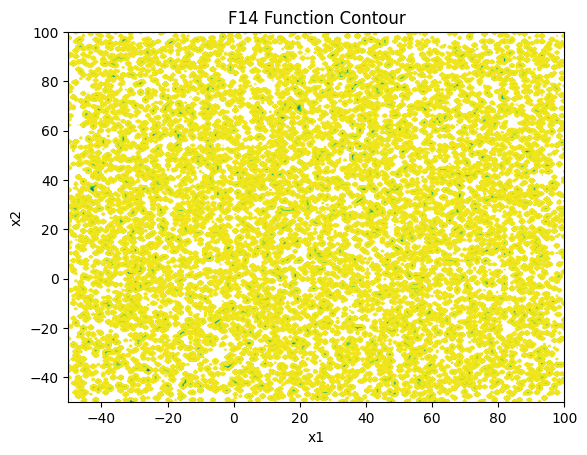

In [16]:
x = np.linspace(-50, 100, 200)
y = np.linspace(-50, 100, 200)
X, Y = np.meshgrid(x, y)
Z = np.array([F14([i, j], a=np.random.uniform(-50, 100, (2, 25))) for i, j in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

plt.contour(X, Y, Z, levels=50)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('F14 Function Contour')
plt.show()

# GIF Generator

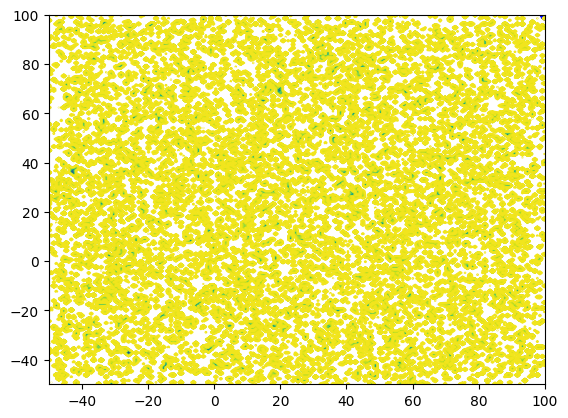

In [17]:
fig, ax = plt.subplots()
ax.contour(X, Y, Z, levels=50)

scat = ax.scatter([pos[0] for pos in positions_agent[0]], [pos[1] for pos in positions_agent[0]], c='blue')

def update_agent(frame):
    scat.set_offsets(positions_agent[frame])
    return scat,

ani_agent = FuncAnimation(fig, update_agent, frames=len(positions_agent), interval=200, blit=True)
ani_agent.save('rao3_algorithm.gif', writer=PillowWriter(fps=5))